In [21]:
import numpy as np
import pandas as pd      #http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [274]:
##without dummies for categorical values
train_set = pd.read_csv('train.csv', header = 0,index_col=None)
test_set = pd.read_csv('test.csv' ,  header = 0,index_col=None)
data =[ train_set,test_set]
for dataset in data:
    for column in dataset:
        enc=LabelEncoder()
        if dataset.dtypes[column]==np.object:
             dataset[column]=enc.fit_transform(dataset[column])    
    dataset.drop([ 'fnlwgt', 'capital_gain','capital_loss', 'native_country'], axis=1, inplace=True)  


In [275]:
train_set.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,wage_class
0,39,7,9,13,4,1,1,4,1,40,0
1,50,6,9,13,2,4,0,4,1,13,0
2,38,4,11,9,0,6,1,4,1,40,0
3,53,4,1,7,2,6,0,2,1,40,0
4,28,4,9,13,2,10,5,2,0,40,0


In [277]:
Xtrain = train_set.drop(columns = ['wage_class'])
ytrain = train_set['wage_class']
Xtest = test_set.drop(columns = ['wage_class'])
ytest = test_set['wage_class']

In [ ]:
#xgboost algorithm

In [278]:
param_grid={
   
    ' learning_rate':[1,0.5],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200],
    'verbosity':[0]
}
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.1s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10, verbosity=0; total time=   0.0s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.4s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 1/5]

[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.4s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=50, verbosity=0; total time=   0.3s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 3/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 4/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.7s
[CV 5/5] END  learning_rate=0.5, max_depth=3, n_estimators=100, verbosity=0; total time=   0.6s
[CV 1/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   1.8s
[CV 2/5] END  learning_rate=0.5, max_depth=3, n_estimators=200, verbosity=0; total time=   1.6s
[CV 3/5] END  learning_rate=0.5, max_depth=

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [280]:
y_pred_new = grid.predict(Xtest)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(ytest,predictions_new)
accuracy_new

0.8387691173760825

best param=  {' learning_rate': 1, 'max_depth': 5, 'n_estimators': 50, 'verbosity': 0}
best score=  0.8430331267157614


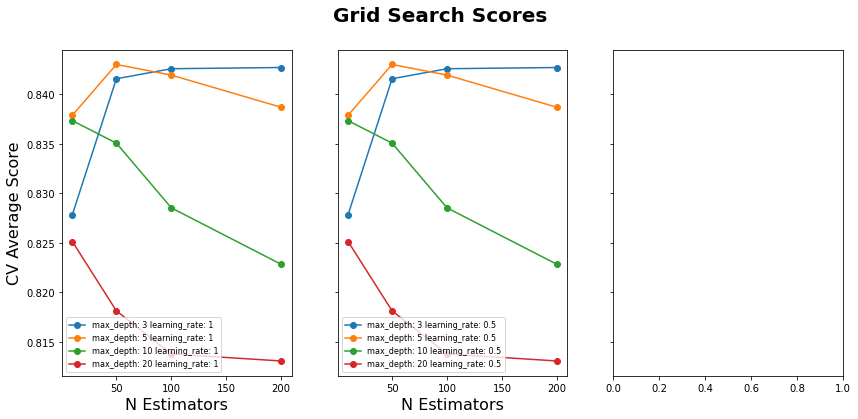

In [282]:
print('best param= ',grid.best_params_)
print('best score= ',grid.best_score_)
learning_rate =[1,0.5]
plot_grid_search(grid.cv_results_, n_estimators,  max_depth, learning_rate, 'N Estimators', 'max_depth', 'learning_rate')

In [19]:
clf = LogisticRegression(random_state=0).fit(Xtrain,ytrain)
y_pred_new = clf.predict(Xtest)
predictions_new = [round(value) for value in y_pred_new]
accuracy_new = accuracy_score(ytest,predictions_new)
accuracy_new

0.837847798046803

In [22]:
clf=GaussianNB()
cv_res=cross_val_score(clf,Xtrain,ytrain,cv=10)
print(cv_res.mean()*100)

60.317560212402086


In [23]:
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,Xtrain,ytrain,cv=10)
print(cv_res.mean()*100)

80.33846774175298


In [24]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,Xtrain,ytrain,cv=10)
print(cv_res.mean()*100)

82.405355050811


In [25]:
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(Xtrain,ytrain)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.8311784608302725
params {'max_features': 5, 'min_samples_leaf': 25, 'n_estimators': 150}
